## Hands-on

### Task 1

In [1]:
import subprocess

try:
    subprocess.run(['pip', 'show', 'mglearn'], check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
except subprocess.CalledProcessError:
    subprocess.run(['pip', 'install', 'mglearn'])

In [2]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import mglearn

In [3]:
# Load data
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=';')

df_red['type'] = 0
df_white['type'] = 1

df_allwine = pd.concat([df_red, df_white])

# Convert to numpy arrays
Xw = df_allwine.iloc[:,:10].values  # dataset
yw_bin = df_allwine['type'].values   # target classification
yw_reg = df_allwine['alcohol'].values   # target regression
yw_mul = df_allwine['quality'].values   # multiclass regression

In [4]:
X_train, X_test, y_train, y_test = train_test_split(Xw, yw_mul,random_state=0)

# Train the SVM model 
svm = SVC()
svm.fit(X_train, y_train)

# scoring on the scaled test set and print it
print("Test set accuracy without scaling: {:.2f}".format(svm.score(X_test, y_test)))

# preprocessing using zero mean and unit variance scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Test set accuracy after scaling and training: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Test set accuracy without scaling: 0.43
Test set accuracy after scaling and training: 0.55


In [5]:
# The same for linear regression
# Linear Regression without scaling
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Linear Regression test set R^2 without scaling: {:.2f}".format(lr.score(X_test, y_test)))

# Linear Regression with scaling
lr.fit(X_train_scaled, y_train)
print("Linear Regression test set R^2 with scaling: {:.2f}".format(lr.score(X_test_scaled, y_test)))

Linear Regression test set R^2 without scaling: 0.25
Linear Regression test set R^2 with scaling: 0.25


### Task 2

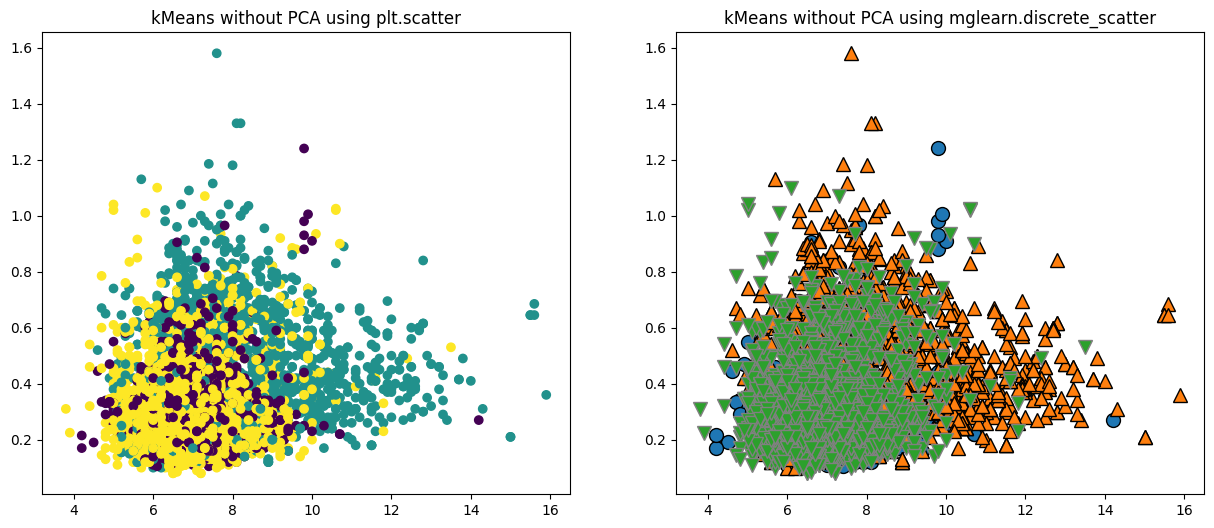

In [6]:
# Run kMeans with 3 clusters on Xw
#Start       
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xw)
assignments = kmeans.labels_
#END

#assignments = kmeans.labels_plt.scatter(Xw[:, 0], Xw[:, 1], c=assignments)
#mglearn.discrete_scatter(Xw[:, 0], Xw[:, 1], assignments, ax=axes[0])
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(Xw[:, 0], Xw[:, 1], c=assignments)
axes[0].set_title('kMeans without PCA using plt.scatter')

mglearn.discrete_scatter(Xw[:, 0], Xw[:, 1], assignments, ax=axes[1])
axes[1].set_title('kMeans without PCA using mglearn.discrete_scatter')

plt.show()

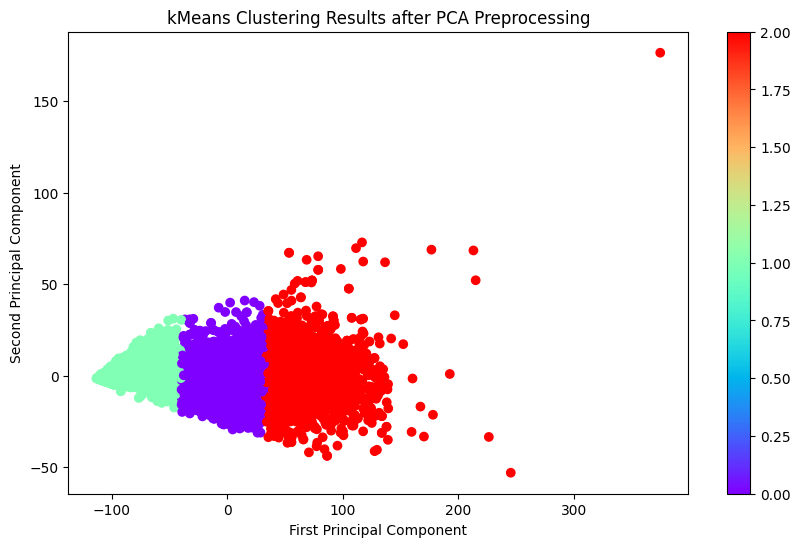

In [7]:
# First preprocessing by PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(Xw)

#Run the kMeans and plot the result for classification
kmeans.fit(X_pca)
assignments_pca = kmeans.labels_

# Visualize 
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=assignments_pca, cmap='rainbow')
plt.title('kMeans Clustering Results after PCA Preprocessing')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()